In [ ]:
#SE CORRE Y SE DEBE VALIDAR CON UNA CUNETA DE GMAIL PARA DAR ACCESO A LOS RECURSOS DE COLLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ruta donde está situado los datos en drive y poderlos cargar
%cd /content/drive/MyDrive/MuTe

/content/drive/MyDrive/MuTe


# **Según lo descrito en el plan**

In [ ]:
#@title imports { display-mode: "form" }

import pandas
from matplotlib import cm as CM
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import random
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold
from sklearn.mixture import GaussianMixture
import scipy as sp
from scipy import stats
import cv2 as cv
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

## Actividades para el objetivo especifico 1: Extraer características discriminantes de los datos proporcionados por el Detector Cherenkov de Agua (WCD, por su siglas en ingles) de MuTe para separar la componente muónica de la componente EM y multipartıcula.




* Extraer los datos crudos del detector y posteriormente ordenarlos.


* Implementar un histograma de carga, para identificar y separar la componente
muuónica de la electromagnética y multipartícula.

In [ ]:
#Ruta donde está situado los datos en drive y poderlos cargar
%cd /content/drive/MyDrive/MuTe/datosUsados
#Carga de datos crudos acotados directamente de la terminal de linux
carga8=np.loadtxt('multi_800.dat')
carga=np.loadtxt('Carga800.dat')
cargat=np.loadtxt('CargaT.dat')

# Cargar los histogramas
H1420 = np.loadtxt('His_14_21.dat')
hist_sorted = H1420[H1420[:,0].argsort()]

/content/drive/MyDrive/MuTe/datosUsados


## Visualización de los datos de diferentes formas 





/content/drive/MyDrive/MuTe/img1


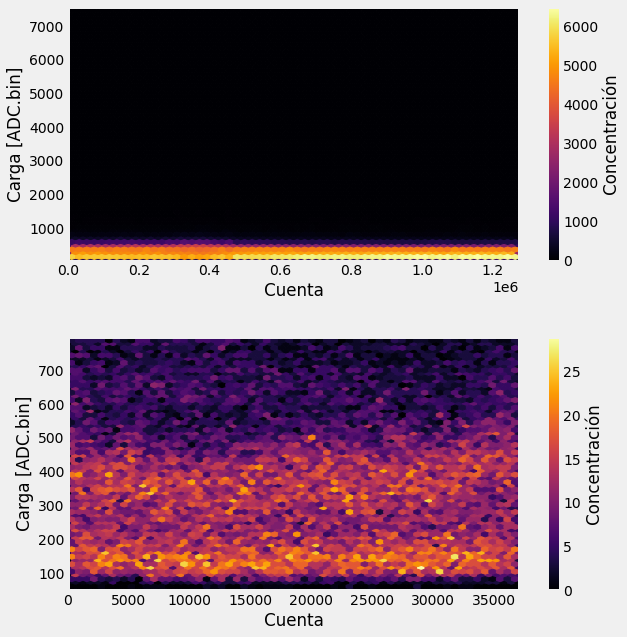

In [ ]:
%cd /content/drive/MyDrive/MuTe/img1

ymin = cargat.min()
ymax = cargat.max()

ymin8 = carga8.min()
ymax8 = carga8.max()

fig, axs = plt.subplots(2, sharey=False, figsize=(9,10))
fig.subplots_adjust(hspace=0.3)

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'

ax = axs[0]
hb = ax.hexbin(range(len(cargat)),cargat, gridsize=60, cmap='inferno')
ax.axis([0, 1273125, ymin, ymax])
ax.set_ylabel("Carga [ADC.bin]");
ax.set_xlabel("Cuenta");
#ax.set_title("Sin ")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Concentración')

ax = axs[1]
hb = ax.hexbin(range(len(carga8)),carga8, gridsize=60,  cmap='inferno')
ax.axis([0, 37081, ymin8, ymax8])
ax.set_ylabel("Carga [ADC.bin]");
ax.set_xlabel("Cuenta");
#ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Concentración')

plt.savefig('dat.png', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

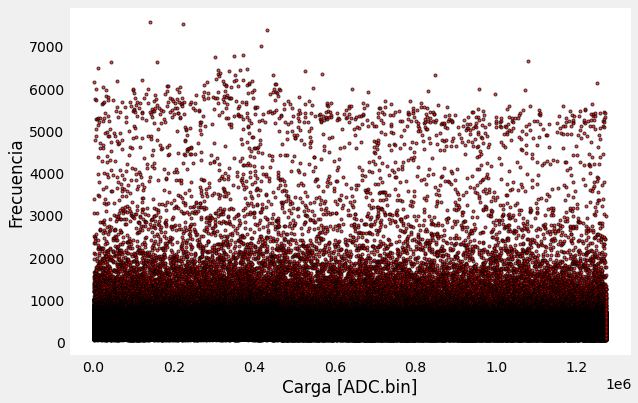

In [ ]:
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.plot(range(len(cargat)),cargat, '.r',markeredgecolor="black",lw=0.1,alpha=0.7, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");
plt.grid(False);
plt.savefig('sus.png', format='png', bbox_inches='tight', pad_inches=0.1)

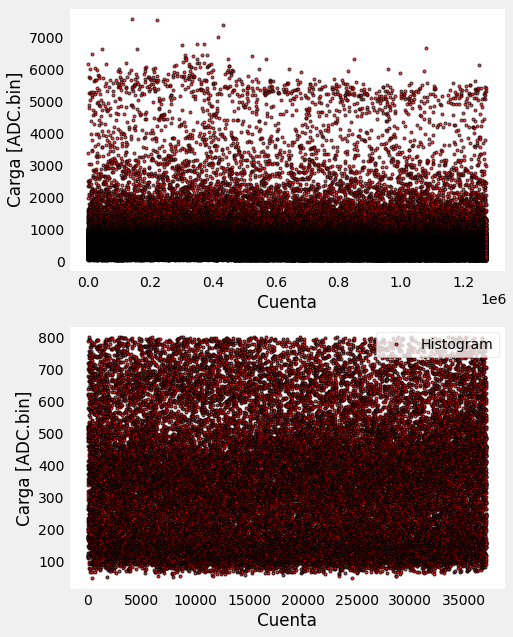

In [ ]:
# Histograma del WCD con hodoscopio 
fig, ax = plt.subplots(2, figsize=(7,10))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'

# Histograma del WCD con hodoscopio 
ax[0].plot(range(len(cargat)),cargat, '.r',markeredgecolor="black",lw=0.1,alpha=0.7, label="Histogram")
ax[0].set_ylabel("Carga [ADC.bin]");
ax[0].set_xlabel("Cuenta");
ax[0].grid(False)

ax[1].plot(range(len(carga8)),carga8, '.r',markeredgecolor="black",lw=0.1, alpha=0.8,label="Histogram")
ax[1].set_ylabel("Carga [ADC.bin]");
ax[1].set_xlabel("Cuenta");
ax[1].grid(False)

plt.legend()
plt.grid(False)
#plt.savefig('dat.png', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

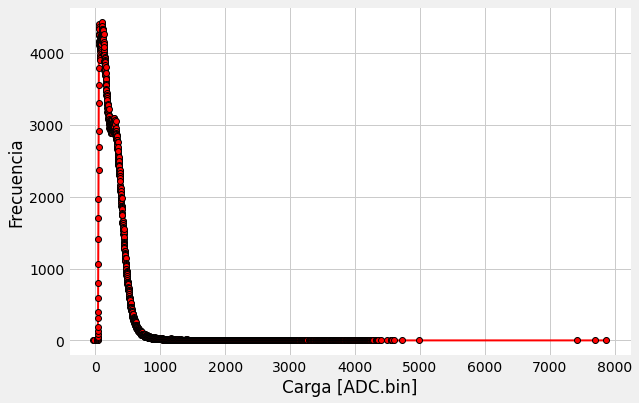

In [ ]:
# Histograma del WCD sin hodoscopio 
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.plot(hist_sorted[:,0],hist_sorted[:,1],'-or',markeredgecolor="black", lw=2, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

plt.grid(True);
plt.show()

In [ ]:

carga8.sort()
carga.sort()

In [ ]:
#se generan los histogramas dato a dato 
carga8
mapa_edades = {}
carga8x= np.array([], dtype=int)
carga8y=np.array([], dtype=int)

for edad in carga8:
	if edad in mapa_edades:
		mapa_edades[edad] += 1
	else:
		mapa_edades[edad] = 1
for valor in sorted(mapa_edades):
  carga8x=np.append(carga8x, valor)
  carga8y=np.append(carga8y, mapa_edades[valor])

carga
mapa_edades = {}
cargax= np.array([], dtype=int)
cargay=np.array([], dtype=int)

for edad in carga:
	if edad in mapa_edades:
		mapa_edades[edad] += 1
	else:
		mapa_edades[edad] = 1
for valor in sorted(mapa_edades):
  cargax=np.append(cargax, valor)
  cargay=np.append(cargay, mapa_edades[valor])

No handles with labels found to put in legend.


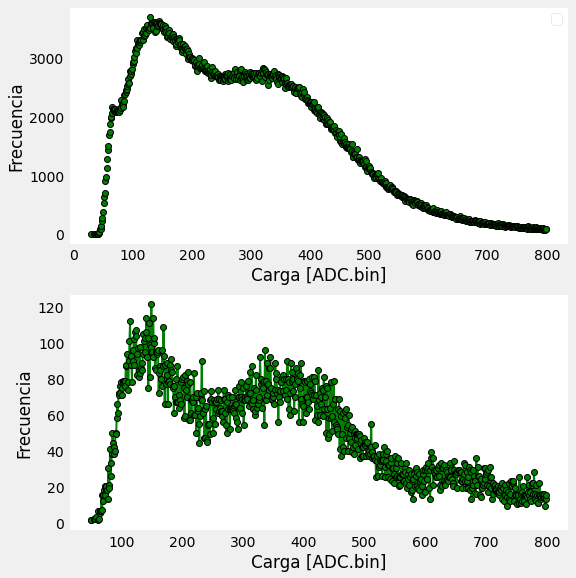

In [ ]:
#histograma de carga WCD
fig, ax = plt.subplots(2, figsize=(8,9))
ax[0].plot(cargax,cargay,'og',markeredgecolor="black", lw=2)
ax[0].set_ylabel("Frecuencia");
ax[0].set_xlabel("Carga [ADC.bin]");
ax[0].grid(False)
ax[0].legend()

#histograma de carga WCD con Hodoscopio
ax[1].plot(carga8x,carga8y,'-og',markeredgecolor="black", lw=2)
ax[1].set_ylabel("Frecuencia");
ax[1].set_xlabel("Carga [ADC.bin]");

plt.grid(False)
#plt.legend()
plt.savefig('hod.png', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
#print(hist_sorted.shape, hist_mult.shape,carga8.shape, carga.shape, acarga.shape)

* Parametrizar los datos para ajustarlo a una distribución probabilística.

Según el histograma podemos parametrizar nuestra función de probabilidad como la mezcla de dos distribuciones normales como sigue:
$M = p\phi_{1}+(1-p)\phi_{2}$

```

```



donde $p$ indica la proporción de la suma (valores entre 0 y 1), y $\phi_1$ y $\phi_2$ son dos distribuciones normales con parametros $\mu_1, \sigma_1, \mu_2, \sigma_2$. Entonces, nuestros datos de modelarán con estos 4 parametros. 


## Actividades para el objetivo especifico 2: Implementar un clasificador de aprendizaje supervisado que permita separar la componente muonica de la componente EM y multipartícula.


* Definir una función de probabilidad optimizando los valores que ajusten a la curva de la distribución seleccionada.

In [ ]:
# Instanciar el modelo
numero_muestras = len(carga8)
# Intentamos ajustar los valores de carga a dos distribuciones normales
GMM = GaussianMixture(n_components=3, 
                      covariance_type='full', 
                      max_iter=1000,
                      n_init=5,
                      weights_init=[.6,.3,.1]) 
# Entrenamiento
GMM.fit(carga8.reshape(-1,1));
print('Converge:',GMM.converged_) # 
# Parámetros
weights = GMM.weights_
means = GMM.means_ 
covariances = GMM.covariances_

Converge: True


In [ ]:
# Evaluar el modelo GMM
# valores de carga
gmm_x = carga8
# obtener las probabilidades para cada valor de carga
gmm_y = np.exp(GMM.score_samples(gmm_x.reshape(-1,1)))

In [ ]:
#se hace una sentencia para separar las componentes y visualizarlas mejor 
muon= np.array([], dtype=int)
ep= np.array([], dtype=int)
multi= np.array([], dtype=int)
picos=np.array([], dtype=int)
j=0
h=0
for x in range(len(gmm_x)):
  h=h+1
  if x ==len(gmm_x)-1:
    picos=np.append(picos, x)
    break
  if gmm_y[x] < gmm_y[x+1] and j==0:
    picos=np.append(picos, x)
    j=1
    continue
  if gmm_y[x] > gmm_y[x+1] and j==1:
    j=0
    continue
for x in range(len(gmm_x)):
  if x ==len(gmm_x)-1:
    break
  if x <= picos[1]:
    ep=np.append(ep, gmm_y[x])
  elif x>picos[1] and x<=picos[2]:
    muon=np.append(muon, gmm_y[x])
  elif x>picos[2] and x<=picos[3]:
    multi=np.append(multi, gmm_y[x])

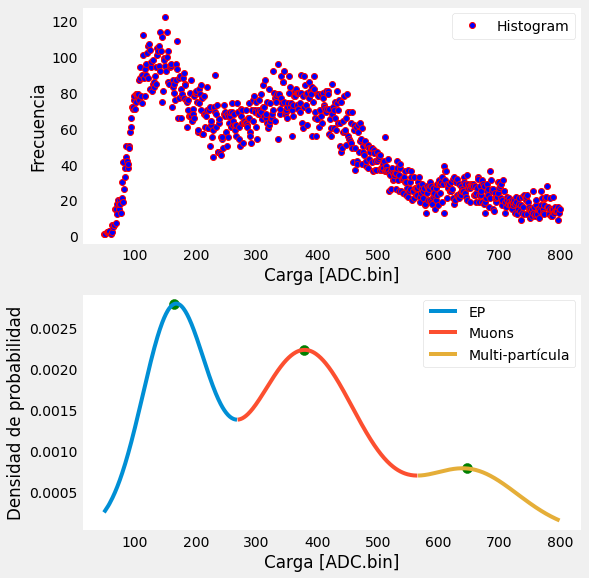

In [ ]:
# Pintar los resultados
#mpl.rcParams['agg.path.chunksize'] = 1000
fig, ax = plt.subplots(2, figsize=(8,9))
# pintar el histograma de carga
ax[0].plot(carga8x,carga8y,'ob',markeredgecolor="red", label="Histogram")
ax[0].set_ylabel("Frecuencia")
ax[0].set_xlabel("Carga [ADC.bin]")
ax[0].grid(False)
ax[0].legend()

# pintar la función de densidad de probabilidad
ax[1].plot(gmm_x[:len(ep)],ep, lw=4, label="EP")
ax[1].plot(gmm_x[len(ep):len(ep)+len(muon)],muon, lw=4, label="Muons")
ax[1].plot(gmm_x[len(ep)+len(muon):len(ep)+len(muon)+len(multi)],multi, lw=4, label="Multi-partícula")
ax[1].scatter(means, np.exp(GMM.score_samples(means.reshape(-1,1))), color='green', s=100)
ax[1].set_ylabel("Densidad de probabilidad")
ax[1].set_xlabel("Carga [ADC.bin]")
ax[1].grid(False)

plt.legend()
#plt.savefig('gmm.eps', format='eps', bbox_inches='tight', pad_inches=0.3)
plt.show()


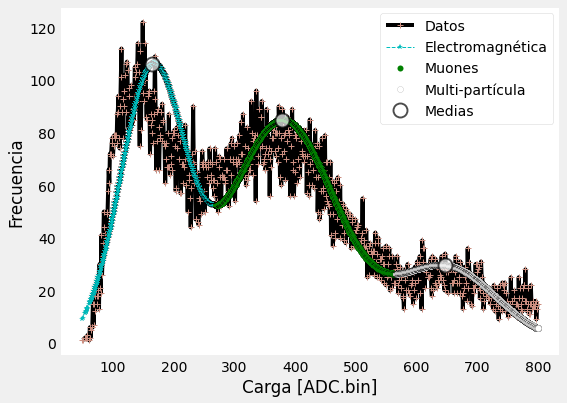

In [ ]:

# pintar la función de densidad de probabilidad
plt.figure(figsize=(8,6))
plt.plot(carga8x,carga8y,'+-k',markeredgecolor="#CC8F81",markeredgewidth=1 , label="Datos")
plt.plot(gmm_x[:len(ep)],38000*ep,'--*c', lw=1 ,markeredgecolor="black",markeredgewidth=0.01 , label="Electromagnética")
plt.plot(gmm_x[len(ep):len(ep)+len(muon)],38000*muon,'og',markeredgecolor="black",markeredgewidth=0.01,  label="Muones")
plt.plot(gmm_x[len(ep)+len(muon):len(ep)+len(muon)+len(multi)],38000*multi,'ow', lw=0.01,markeredgecolor="black",markeredgewidth=0.1, label="Multi-partícula")
plt.plot(means, 38000*np.exp(GMM.score_samples(means.reshape(-1,1))), 'ow',markeredgecolor="black",alpha=0.7,ms=14,markeredgewidth=1.9,label="Medias")
plt.ylabel("Frecuencia")
plt.xlabel("Carga [ADC.bin]")
plt.grid(False)
#plt.plot(means, 38000*np.exp(GMM.score_samples(means.reshape(-1,1))), color='#DCD5D3', edgecolors = 'blue',linewidths=3, s=300, label="Medias")

plt.legend()
plt.savefig('gmm.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

* A partir de los valores ajustados con la funcion de densidad de probabilidad (PDF), analizar independientemente cada componente por medio de la distribucion extraıda del histograma de carga.

In [ ]:
print('Parametros')
print('medias', means)
print('varianzas', covariances)
print('pesos', weights)

Parametros
medias [[378.86640866]
 [164.58375952]
 [647.06204375]]
varianzas [[[7546.88449091]]

 [[2778.27258641]]

 [[6968.68871945]]]
pesos [0.48519131 0.35521695 0.15959174]


In [ ]:
#se organizan los parámetros con su respectivo par 
covariances=covariances[np.argsort(means.flatten())]
means=means[np.argsort(means.flatten())]
means, covariances

(array([[164.58375952],
        [378.86640866],
        [647.06204375]]), array([[[2778.27258641]],
 
        [[7546.88449091]],
 
        [[6968.68871945]]]))

In [ ]:
# Se define una función gaussiana para analizar independientemente cada normal estimada
def gaussian_pdf(x, mu, std, scale=1):
  return scale*np.exp((-(x-mu)**2)/(2*(std**2)))

# Construir las distribuciones
Muons_distribucion = gaussian_pdf(x=gmm_x, mu=means[1], std=np.sqrt(covariances[1]), scale=3000)
Mult_distribucion = gaussian_pdf(x=gmm_x, mu=means[2], std=np.sqrt(covariances[2]), scale=1000)
EM_distribucion = gaussian_pdf(x=gmm_x, mu=means[0], std=np.sqrt(covariances[0]), scale=4200)

In [ ]:
punm= np.array([], dtype=int)
m=0

for x in range(len(gmm_x)):
  if EM_distribucion[0,x] < Muons_distribucion[0,x] and m == 0:
    punm=np.append(punm, gmm_x[x])
    m=1
    continue
  elif Muons_distribucion[0,x] < Mult_distribucion[0,x]:
    punm=np.append(punm, gmm_x[x])
    break
punm

array([253., 546.])

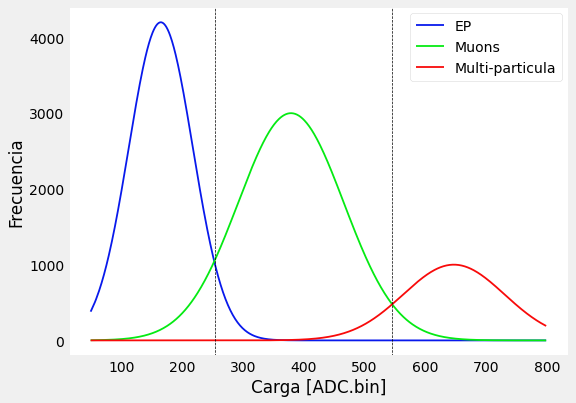

In [ ]:
# Mostrar las tres componetes indendientemente
plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.plot(gmm_x, np.squeeze(EM_distribucion),'-',c='#0819EC',markeredgecolor="#0819EC", lw=1.8, label="EP");
plt.plot(gmm_x, np.squeeze(Muons_distribucion),'-',c='#05EA13',markeredgecolor="#0819EC", lw=1.8, label="Muons");
plt.plot(gmm_x, np.squeeze(Mult_distribucion),'-',c='#F80A0A',markeredgecolor="#0819EC", lw=1.8, label="Multi-particula");
plt.axvline(punm[0], color='k',ls='--', lw=0.7)
plt.axvline(punm[1], color='k',ls='--', lw=0.7)
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

#plt.box()
plt.grid(False)
plt.legend()
plt.savefig('ind.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

* Evaluando las componentes independientes, se etiqueta cada tupla de datos con
unos y ceros, mounes y EP respectivamente.

In [ ]:
#no se tiene en cuenta 
for x in range(len(gmm_x)):
  if np.squeeze(EM_distribucion)[x] <  np.squeeze(Muons_distribucion)[x]:
    break
n=x
np.squeeze(EM_distribucion)[[x-1,x]], np.squeeze(Muons_distribucion)[[x-1,x]], carga8[n], n


(array([1036.03831597, 1000.6694996 ]),
 array([1015.07602278, 1032.44440294]),
 241.0,
 12728)

In [ ]:
# se etiqueta cada valor de carga con 2, 1 y 0 dependiendo del valor de probabilidad de cada pdf
# 1 para muones - 0 para EM - 2 para Multi partícula
etiquetas1= np.array([], dtype=int)
for x in range(len(gmm_x)):
  if EM_distribucion[0,x] > Muons_distribucion[0,x] and EM_distribucion[0,x] > Mult_distribucion[0,x]:
    etiquetas1=np.append(etiquetas1, 0)
  elif Muons_distribucion[0,x] > EM_distribucion[0,x] and Muons_distribucion[0,x] > Mult_distribucion[0,x]:
    etiquetas1=np.append(etiquetas1, 1)
  elif Mult_distribucion[0,x] > EM_distribucion[0,x] and Mult_distribucion[0,x] > Muons_distribucion[0,x]:
      etiquetas1=np.append(etiquetas1, 2)
etiquetas1, etiquetas1[n-1:n+5]
etiquetas1.shape, gmm_x.shape

((37081,), (37081,))

In [ ]:
# se etiqueta cada valor de carga con unos y ceros dependiendo del valor de probabilidad de cada pdf
# 1 para muones - 0 para EM
etiquetas = np.array(EM_distribucion < Muons_distribucion, dtype=int)
print (etiquetas.shape)

(1, 37081)


In [ ]:
print('Numero de elemento por etiqueta')
np.unique(etiquetas1, return_counts=True)

Numero de elemento por etiqueta


(array([0, 1, 2]), array([12728, 18123,  6230]))

* Para el entrenamiento de los datos con el modelo a emplear, se usan caracteristicas y etiquetas, de tal manera que se pueda evaluar el comportamiento del clasificador
a usar

Para la clasificacion supervisada se va a utilizar un clasificador gausiano y para poder evaluar el modelo se dividira los datos en train y test de manera aleatoria usando train_test_split con un porcentaje fijo. Otros esquemas de evaluacion pueden aplicarse como validacion cruzada y train test split estratificado. [métodos](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

# **Validación cruzada**

In [ ]:
kf = KFold(n_splits=20, shuffle=True)
kf.get_n_splits(gmm_x)

20

In [ ]:
# crear el modelo
clfG = GaussianNB()
me=0
c=0
de=0
for train_index, test_index in kf.split(gmm_x):
     #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = gmm_x[train_index], gmm_x[test_index]
     y_train, y_test = np.squeeze(etiquetas1)[train_index], np.squeeze(etiquetas1)[test_index]
     # entrenar el modelo en los datos de entrenamiento
     clfG.fit(X_train.reshape(-1, 1), y_train)
     scores = cross_val_score(clfG,X_test.reshape(-1, 1), y_test, cv=5)
     # obtenemos las etiquetas predichas por el modelo 
     y_pred = clfG.predict(X_test.reshape(-1, 1))
     #print('Accuracy promedio en test: ', clfG.score(X_test.reshape(-1, 1), y_test))
     me=me+scores.mean()
     de=de+scores.std()
     c=c+1
     #print("%0.2f accuracy con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))
print('en promedio con', kf.get_n_splits(gmm_x) ,'particiones se presentó\n')     
print("%0.2f accuracy con una desviacion estandar de %0.2f" % (me/c,de/c ))

en promedio con 20 particiones se presentó

0.89 accuracy con una desviacion estandar de 0.14


In [ ]:
# crear el modelo
clfRF = RandomForestClassifier()
me=0
c=0
de=0
for train_index, test_index in kf.split(gmm_x):
     #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = gmm_x[train_index], gmm_x[test_index]
     y_train, y_test = np.squeeze(etiquetas1)[train_index], np.squeeze(etiquetas1)[test_index]
     # entrenar el modelo en los datos de entrenamiento
     clfRF.fit(X_train.reshape(-1, 1), y_train)
     scores = cross_val_score(clfRF,X_test.reshape(-1, 1), y_test, cv=5)
     # obtenemos las etiquetas predichas por el modelo 
     y_pred = clfRF.predict(X_test.reshape(-1, 1))
     #print('Accuracy promedio en test: ', clfRF.score(X_test.reshape(-1, 1), y_test))
     me=me+scores.mean()
     de=de+scores.std()
     c=c+1
     #print("%0.4f accuracy con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))
print('en promedio con', kf.get_n_splits(gmm_x) ,'particiones se presentó\n')     
print("%0.2f accuracy con una desviacion estandar de %0.2f" % (me/c,de/c ))

en promedio con 20 particiones se presentó

0.86 accuracy con una desviacion estandar de 0.17


In [ ]:
# crear el modelo
clfSV = svm.SVC()
me=0
c=0
de=0
for train_index, test_index in kf.split(gmm_x):
     #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = gmm_x[train_index], gmm_x[test_index]
     y_train, y_test = np.squeeze(etiquetas1)[train_index], np.squeeze(etiquetas1)[test_index]
     # entrenar el modelo en los datos de entrenamiento
     clfSV.fit(X_train.reshape(-1, 1), y_train)
     scores = cross_val_score(clfSV,X_test.reshape(-1, 1), y_test, cv=5)
     # obtenemos las etiquetas predichas por el modelo 
     y_pred = clfSV.predict(X_test.reshape(-1, 1))
     #print('Accuracy promedio en test: ', clfSV.score(X_test.reshape(-1, 1), y_test))
     me=me+scores.mean()
     de=de+scores.std()
     c=c+1
     #print("%0.4f accuracy con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))
print('en promedio con', kf.get_n_splits(gmm_x) ,'particiones se presentó\n')     
print("%0.2f accuracy con una desviacion estandar de %0.2f" % (me/c,de/c )) 

en promedio con 20 particiones se presentó

0.86 accuracy con una desviacion estandar de 0.17


In [ ]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor'] = 'white'

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    #ax.scatter(range(len(X)), [ii + 2.5] * len(X),
     #          c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['Clase']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Índices', ylabel="Muestras",
           ylim=[n_splits+2.2, -.2], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

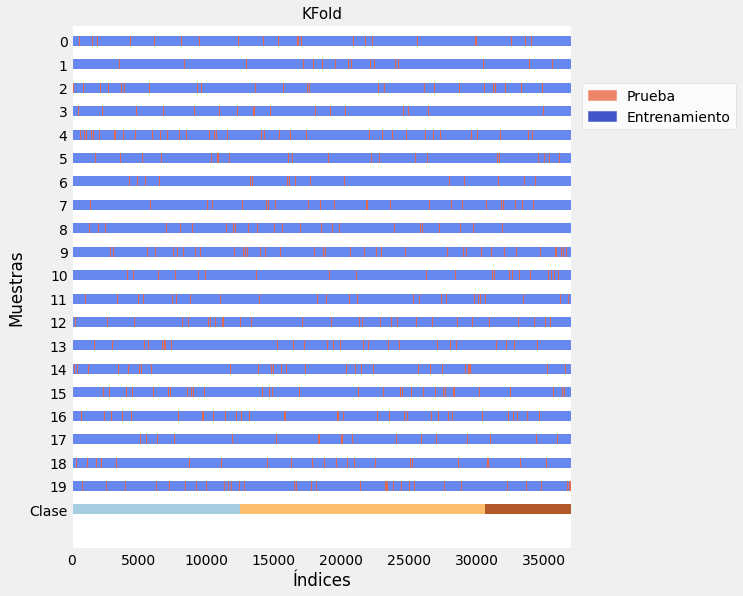

In [ ]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
fig, ax = plt.subplots(figsize=(8,9))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'white'
plot_cv_indices(kf, gmm_x, etiquetas1, ax, kf.get_n_splits(gmm_x))
plt.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Prueba', 'Entrenamiento'], loc=(1.02, .8))
plt.grid(False)
plt.savefig('kf.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

#**Entrenamiento y predicción**

In [ ]:
# dividir los datos en train (70%) y test (30%) seleccionados de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(gmm_x, np.squeeze(etiquetas1), test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# crear el modelo
clfG = GaussianNB()
# entrenar el modelo en los datos de entrenamiento
clfG.fit(X_train.reshape(-1, 1), y_train)
# obtenemos las etiquetas predichas por el modelo 
y_pred = clfG.predict(X_test.reshape(-1, 1))
print('MAtriz de confusión NG:')
print(confusion_matrix(y_test, y_pred))

MAtriz de confusión NG:
[[3874   11    0]
 [   0 5309    0]
 [   0   82 1849]]


In [ ]:
y_pred

array([1, 2, 2, ..., 1, 1, 2])

In [ ]:
# evaluar el modelo en train y test
print('Accuracy promedio en train:')
clfG.score(X_train.reshape(-1, 1), y_train) 


Accuracy promedio en train:


0.9915626444752659

In [ ]:
print('Accuracy promedio en test:')
clfG.score(X_test.reshape(-1, 1), y_test)

Accuracy promedio en test:


0.9916404494382023

In [ ]:
print('Principales métricas para NG:')
print(classification_report(y_test, y_pred, target_names = ['EM', 'Muon', 'Mult_P']))

Principales métricas para NG:
              precision    recall  f1-score   support

          EM       1.00      1.00      1.00      3885
        Muon       0.98      1.00      0.99      5309
      Mult_P       1.00      0.96      0.98      1931

    accuracy                           0.99     11125
   macro avg       0.99      0.98      0.99     11125
weighted avg       0.99      0.99      0.99     11125



In [ ]:
pmuon= np.array([], dtype=int)
pep= np.array([], dtype=int)
pmulti= np.array([], dtype=int)
picos=np.array([], dtype=int)

y_pred=y_pred[np.argsort(X_test.flatten())]
X_testn=X_test[np.argsort(X_test.flatten())]


for x in range(len(X_testn)):
  if x ==len(X_testn)-1:
    break
  if y_pred[x] == 0:
    pep=np.append(pep, X_testn[x])
  elif y_pred[x] == 1:
    pmuon=np.append(pmuon, X_testn[x])
  elif y_pred[x] ==2:
    pmulti=np.append(pmulti, X_testn[x])

In [ ]:
1/5

0.2

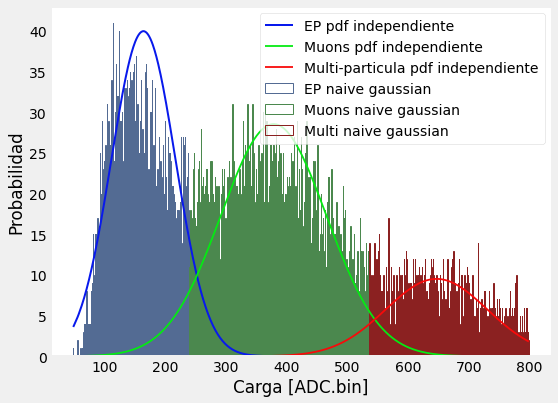

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.hist(pep,bins=500, histtype='step',color='#536B93',lw=1,label='EP naive gaussian')
plt.hist(pmuon,bins=500, histtype='step' ,color='#4B884E',lw=1,label='Muons naive gaussian')
plt.hist(pmulti,bins=500,histtype='step' ,color='#8B2121', lw=1,label='Multi naive gaussian')
plt.plot(gmm_x, (1/105)*np.squeeze(EM_distribucion),'-',c='#0819EC',markeredgecolor="black",markeredgewidth=0.10, lw=2, label="EP pdf independiente");
plt.plot(gmm_x, (1/105)*np.squeeze(Muons_distribucion),'-',c='#05EA13',markeredgecolor="#0819EC", lw=1.8, label="Muons pdf independiente");
plt.plot(gmm_x, (1/105)* np.squeeze(Mult_distribucion),'-',c='#F80A0A',markeredgecolor="#0819EC", lw=1.8, label="Multi-particula pdf independiente");
plt.ylabel("Probabilidad");
plt.xlabel("Carga [ADC.bin]");
plt.grid(False)
plt.legend()
plt.savefig('pred.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

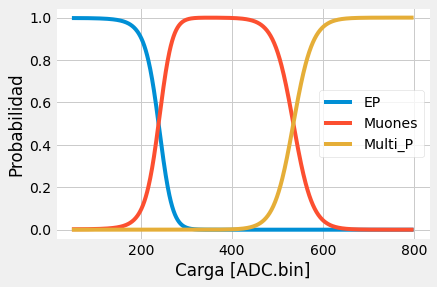

In [ ]:
plt.plot(gmm_x, clfG.predict_proba(gmm_x.reshape(-1, 1))[:,0], label='EP')
plt.plot(gmm_x, clfG.predict_proba(gmm_x.reshape(-1, 1))[:,1], label='Muones')
plt.plot(gmm_x, clfG.predict_proba(gmm_x.reshape(-1, 1))[:,2], label='Multi_P')
plt.ylabel("Probabilidad");
plt.xlabel("Carga [ADC.bin]");
plt.legend()
plt.show()

<h1>Clasificador Random Forest 

In [ ]:
# dividir los datos en train (70%) y test (30%) seleccionados de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(gmm_x, np.squeeze(etiquetas1), test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# crear el modelo
clfRF = RandomForestClassifier(n_estimators=1)
clfRF.fit(X_train.reshape(-1, 1), y_train)
y_pred = clfRF.predict(X_test.reshape(-1, 1))
print('MAtriz de confusión RFC:')
print(confusion_matrix(y_test, y_pred))

MAtriz de confusión RFC:
[[3885    0    0]
 [   0 5309    0]
 [   0    0 1931]]


In [ ]:
# evaluar el modelo en train y test
print('Accuracy promedio en train:')
clfRF.score(X_train.reshape(-1, 1), y_train)

Accuracy promedio en train:


1.0

In [ ]:
print('Accuracy promedio en test:')
clfRF.score(X_test.reshape(-1, 1), y_test)

Accuracy promedio en test:


1.0

In [ ]:
print('Principales métricas para RFC:')
print(classification_report(y_test, y_pred, target_names = ['EM', 'Muon', 'Mult_P']))

Principales métricas para RFC:
              precision    recall  f1-score   support

          EM       1.00      1.00      1.00      3885
        Muon       1.00      1.00      1.00      5309
      Mult_P       1.00      1.00      1.00      1931

    accuracy                           1.00     11125
   macro avg       1.00      1.00      1.00     11125
weighted avg       1.00      1.00      1.00     11125



In [ ]:
pmuon= np.array([], dtype=int)
pep= np.array([], dtype=int)
pmulti= np.array([], dtype=int)
picos=np.array([], dtype=int)

y_pred=y_pred[np.argsort(X_test.flatten())]
X_testn=X_test[np.argsort(X_test.flatten())]


for x in range(len(X_testn)):
  if x ==len(X_testn)-1:
    break
  if y_pred[x] == 0:
    pep=np.append(pep, X_testn[x])
  elif y_pred[x] == 1:
    pmuon=np.append(pmuon, X_testn[x])
  elif y_pred[x] ==2:
    pmulti=np.append(pmulti, X_testn[x])

<h1>Clasificador Support Vector Machine

In [ ]:
# crear el modelo
clfSV = svm.SVC()
clfSV.fit(X_train.reshape(-1, 1), y_train)
y_pred = clfSV.predict(X_test.reshape(-1, 1))
print('MAtriz de confusión SPM:')
print(confusion_matrix(y_test, y_pred))

MAtriz de confusión SPM:
[[3885    0    0]
 [   0 5309    0]
 [   0    0 1931]]


In [ ]:
# evaluar el modelo en train y test
print('Accuracy promedio en train:')
clfSV.score(X_train.reshape(-1, 1), y_train)

Accuracy promedio en train:


1.0

In [ ]:
print('Accuracy promedio en test:')
clfSV.score(X_test.reshape(-1, 1), y_test)

Accuracy promedio en test:


1.0

In [ ]:
print('Principales métricas para SPM:')
print(classification_report(y_test, y_pred, target_names = ['EM', 'Muon', 'Mult_P']))

Principales métricas para SPM:
              precision    recall  f1-score   support

          EM       1.00      1.00      1.00      3885
        Muon       1.00      1.00      1.00      5309
      Mult_P       1.00      1.00      1.00      1931

    accuracy                           1.00     11125
   macro avg       1.00      1.00      1.00     11125
weighted avg       1.00      1.00      1.00     11125



Notas: Los datos pueden ser separados usado otros metodos como [otsu](http://www.idlcoyote.com/code_tips/otsu_threshold.php). Una camino mas formal para encontrar el punto de corte se puede consultar aqui [Finite mixture models](http://marcchoisy.free.fr/fmm/index.html) es el mismo sentido que manejamos para estimar los parametros pero la diferencia recae en que no se hace analisis independiente para encontrar el punto de corte entre las dos distribuciones. Además, con respecto a los metodos de clasificacion, se pueden usar varios pero todos tendria mas o menos el mismo redimiento ya que los datos no son complejos de separar.